LOAD DATA:

In [0]:
import numpy as np 
import os 
###https://www.geeksforgeeks.org/working-zip-files-python/
##import zip code from here

# importing required modules 
from zipfile import ZipFile 

# opening the zip file in READ mode
with ZipFile('/content/foreign-exchange-rates-per-dollar-20002019.zip', 'r') as zip: 
    # printing all the contents of the zip file 
    # zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

Extracting all the files now...
Done!


In [0]:
import pandas as pd
xdf = pd.read_excel (r'/content/Foreign_Exchange_Rates.xlsx')
xdf

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,1128,9.4015,6.126,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,9.457,6.085,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,1135,9.535,6.07,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,1146.5,9.567,6.08,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,1138,9.52,6.057,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5212,2019-12-25,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
5213,2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.788,71.28,1161.18,18.944,14.132,1.354,6.7295,109.67,4.1337,8.8799,9.4108,181.3,0.9808,30.11,30.15
5214,2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,71.45,1160.87,18.819,14.025,1.352,6.6829,109.47,4.126,8.8291,9.3405,181.35,0.9741,30.09,30.14
5215,2019-12-30,1.4278,0.8915,1.4846,0.761,4.0152,1.3058,6.9864,7.7857,71.3,1155.75,18.863,14.056,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.6,0.9677,30.04,29.94


In [0]:
xdf.columns

Index(['Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$'],
      dtype='object')

In [0]:
# RENAME DATE attribute
xdf.rename(columns={'Time Serie':'DATE'}, inplace=True) 

In [0]:
# replace ND with nan and then replace their values with backward and forward values.
xdf = xdf.replace("ND", np.nan)
xdf = xdf.fillna(method='bfill').fillna(method='ffill')

In [0]:
# set DATE column as index of the dataframe:
xdf = xdf.set_index("DATE")
# xdf.head()

In [0]:
xdf.index = pd.to_datetime(xdf.index)

In [0]:
# typeconversion of all
xdf = xdf.astype(float)

In [0]:
# length of records:
len(xdf)

5217

In [0]:
print("Total number of days between {} and {} are {}".format(xdf.index.min().date(), xdf.index.max().date(), (xdf.index.max() - xdf.index.min()).days+1))

Total number of days between 2000-01-03 and 2019-12-31 are 7303


In [0]:
# Prepare a full dataframe
num_records = 7303
data = {}

In [0]:
# fill all the columns with columns
data["DATE"] = pd.date_range("2000-01-03", "2019-12-31")

In [0]:
# all th range from 2000 jan to 2019 dec
data['DATE']

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-08', '2000-01-09', '2000-01-10',
               '2000-01-11', '2000-01-12',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=7303, freq='D')

In [0]:
complete = pd.DataFrame(data=data)
# new dataframe 
complete

,DATE
0,2000-01-03
1,2000-01-04
2,2000-01-05
3,2000-01-06
4,2000-01-07
...,...
7298,2019-12-27
7299,2019-12-28
7300,2019-12-29
7301,2019-12-30


In [0]:
xdf.head()

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
DATE,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.0,9.4015,6.126,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,9.4570,6.085,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.0,9.5350,6.070,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.5,9.5670,6.080,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.0,9.5200,6.057,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [0]:
# index replace:
complete = complete.set_index("DATE")

In [0]:
complete = pd.concat([complete,xdf], axis=1)

In [0]:
complete

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
DATE,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.00,9.4015,6.126,1.6563,7.3290,101.70,3.8000,7.9640,8.4430,72.30,1.5808,31.38,36.97
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.50,9.4570,6.085,1.6535,7.2180,103.09,3.8000,7.9340,8.3600,72.65,1.5565,30.60,37.13
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.00,9.5350,6.070,1.6560,7.2080,103.77,3.8000,7.9350,8.3530,72.95,1.5526,30.80,37.10
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.50,9.5670,6.080,1.6655,7.2125,105.19,3.8000,7.9400,8.3675,72.95,1.5540,31.75,37.62
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.00,9.5200,6.057,1.6625,7.2285,105.17,3.8000,7.9660,8.4150,73.15,1.5623,30.85,37.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,71.45,1160.87,18.8190,14.025,1.3520,6.6829,109.47,4.1260,8.8291,9.3405,181.35,0.9741,30.09,30.14
2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# fill na value by above and below rows
complete = complete.fillna(method='bfill').fillna(method='ffill')

In [0]:
complete.tail()

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
DATE,,,,,,,,,,,,,,,,,,,,,,
2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,71.45,1160.87,18.819,14.025,1.3520,6.6829,109.47,4.1260,8.8291,9.3405,181.35,0.9741,30.09,30.14
2019-12-28,1.4278,0.8915,1.4846,0.7610,4.0152,1.3058,6.9864,7.7857,71.30,1155.75,18.863,14.056,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.60,0.9677,30.04,29.94
2019-12-29,1.4278,0.8915,1.4846,0.7610,4.0152,1.3058,6.9864,7.7857,71.30,1155.75,18.863,14.056,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.60,0.9677,30.04,29.94
2019-12-30,1.4278,0.8915,1.4846,0.7610,4.0152,1.3058,6.9864,7.7857,71.30,1155.75,18.863,14.056,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.60,0.9677,30.04,29.94
2019-12-31,1.4225,0.8907,1.4826,0.7536,4.0190,1.2962,6.9618,7.7894,71.36,1155.46,18.860,13.973,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.30,0.9677,29.91,29.75


In [0]:
# to visualise after filling the na values
toInspect = ["INDIA - INDIAN RUPEE/US$", "CHINA - YUAN/US$", "EURO AREA - EURO/US$"]

In [0]:
rows, cols = 3, 2

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


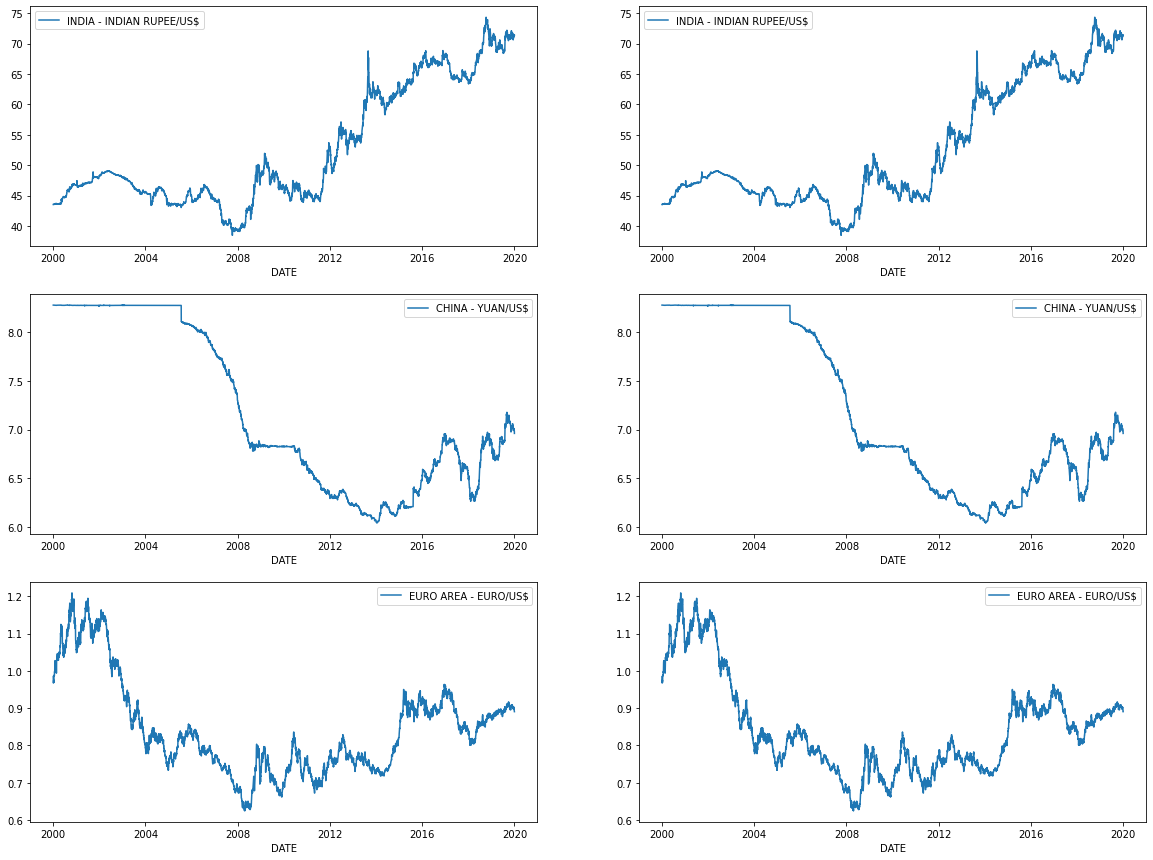

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(rows, cols, figsize=(20,rows*5))
for row in range(rows):
    sns.lineplot(data=xdf[[toInspect[row]]], ax=ax[row][0])
    sns.lineplot(data=complete[[toInspect[row]]], ax=ax[row][1])

 Visualization to show that:even after interpolating the nan values property of data did't change

In [0]:
# for creating dataframe of required number of column and rows:
def For_one_Timeseries_data(column_,window):
  X=[]
  y=[]
  n=len(column_)
  for i in range(n):
    end=i+window
    if end < (n-1):
      X.append(column_[i:end])
      y.append(column_[end])
    else:
      break
  return np.array(X), np.array(y)

In [0]:
xdf.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
               '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='DATE', length=5217, freq=None)

Linear regression:

In [0]:
import numpy as np
from sklearn.model_selection import KFold
def predictions(X_train1, X_test1, y_train1, y_test1):
  X = np.asarray(X_train1)
  y = np.asarray(y_train1)
  kf = KFold(n_splits=10)
  kf.get_n_splits(X)
  Accuracy_foldwise=[]
  i=0
  for train_index, test_index in kf.split(X,y):
      # print("TRAIN:", train_index, "TEST:", test_index)
      i+=1
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      neigh =linear_model.LinearRegression()
      neigh.fit(X_train, y_train)
      pred=neigh.predict(X_test)
      print("split-",i,'- Mean squared error: %.4f'% mean_squared_error(y_test, pred))
  neigh.fit(X, y)
  y_pred=neigh.predict(X_test1)
  print("for overall data:")
  print('Mean squared error: %.4f'% mean_squared_error(y_test1, y_pred))
  return mean_squared_error(y_test1, y_pred)
  print("----------------------------------------------------------------------------------------")

In [0]:
from sklearn.model_selection import train_test_split
num_features = 1
windows=[2,7,15,30,60,90,120,150,180,210,240,270,300,330,365]
MSE_wrt_window=[]
for i in windows:
  print("window size:",i)
  X, y = For_one_Timeseries_data(list(complete["INDIA - INDIAN RUPEE/US$"]), window=i)
  print("X:", X)
  print("Y:", y)
  print("X:", X.shape)
  print("Y:", y.shape)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  print("X train:", X_train.shape)
  print("y train:", y_train.shape)
  print("X test:", X_test.shape)
  print("y test:", y_test.shape) 
  MSE_wrt_window.append(predictions(X_train, X_test, y_train, y_test))

window size: 2
X: [[43.55 43.55]
 [43.55 43.55]
 [43.55 43.55]
 ...
 [71.28 71.45]
 [71.45 71.3 ]
 [71.3  71.3 ]]
Y: [43.55 43.55 43.55 ... 71.3  71.3  71.3 ]
X: (7300, 2)
Y: (7300,)
X train: (5840, 2)
y train: (5840,)
X test: (1460, 2)
y test: (1460,)
split- 1 - Mean squared error: 0.0295
split- 2 - Mean squared error: 0.0419
split- 3 - Mean squared error: 0.0491
split- 4 - Mean squared error: 0.0444
split- 5 - Mean squared error: 0.0407
split- 6 - Mean squared error: 0.0412
split- 7 - Mean squared error: 0.0454
split- 8 - Mean squared error: 0.0392
split- 9 - Mean squared error: 0.0369
split- 10 - Mean squared error: 0.0407
for overall data:
Mean squared error: 0.0356
window size: 7
X: [[43.55 43.55 43.55 ... 43.55 43.55 43.55]
 [43.55 43.55 43.55 ... 43.55 43.55 43.55]
 [43.55 43.55 43.55 ... 43.55 43.55 43.6 ]
 ...
 [71.24 71.24 71.24 ... 71.28 71.28 71.45]
 [71.24 71.24 71.23 ... 71.28 71.45 71.3 ]
 [71.24 71.23 71.28 ... 71.45 71.3  71.3 ]]
Y: [43.55 43.6  43.6  ... 71.3  71.3  7

mse values at different time interval:
[0.03564495109819789, 0.03126129820475538, 0.03896998930690693, 0.03499304268862334, 0.03840052666399587, 0.03992860163887456, 0.034458756612236394, 0.03672181098739156, 0.04064284282386023, 0.035478494037872225, 0.03912522702348224, 0.04241120469588012, 0.04056674456559203, 0.03513121987587148, 0.04303911939801547]


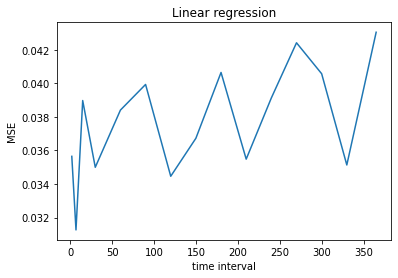

In [0]:
print("mse values at different time interval:")
print(MSE_wrt_window)
plt.plot(windows,MSE_wrt_window)
plt.xlabel('time interval')
plt.ylabel('MSE')
plt.title('Linear regression')
plt.show()

SVC bagging:

In [0]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
def predictions(X_train1, X_test1, y_train1, y_test1):
  X = np.asarray(X_train1)
  y = np.asarray(y_train1)
  kf = KFold(n_splits=10)
  kf.get_n_splits(X)
  Accuracy_foldwise=[]
  i=0
  for train_index, test_index in kf.split(X,y):
      # print("TRAIN:", train_index, "TEST:", test_index)
      i+=1
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      neigh = BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0)
      neigh.fit(X_train, y_train)
      pred=neigh.predict(X_test)
      print("split-",i,'- Mean squared error: %.4f'% mean_squared_error(y_test, pred))
  neigh=BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0).fit(X, y)
  y_pred=neigh.predict(X_test1)
  print("for overall data:")
  print('Mean squared error: %.4f'% mean_squared_error(y_test1, y_pred))
  return mean_squared_error(y_test1, y_pred)
  print("----------------------------------------------------------------------------------------")

In [0]:
from sklearn.model_selection import train_test_split
num_features = 1
windows=[2,7,15,30,60,90,120,150,180,210,240,270,300,330,365]
MSE_wrt_window=[]
for i in windows:
  print("window size:",i)
  X, y = For_one_Timeseries_data(list(complete["INDIA - INDIAN RUPEE/US$"]), window=i)
  print("X:", X)
  print("Y:", y)
  print("X:", X.shape)
  print("Y:", y.shape)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  print("X train:", X_train.shape)
  print("y train:", y_train.shape)
  print("X test:", X_test.shape)
  print("y test:", y_test.shape) 
  MSE_wrt_window.append(predictions(X_train, X_test, y_train, y_test))

window size: 2
X: [[43.55 43.55]
 [43.55 43.55]
 [43.55 43.55]
 ...
 [71.28 71.45]
 [71.45 71.3 ]
 [71.3  71.3 ]]
Y: [43.55 43.55 43.55 ... 71.3  71.3  71.3 ]
X: (7300, 2)
Y: (7300,)
X train: (5840, 2)
y train: (5840,)
X test: (1460, 2)
y test: (1460,)
split- 1 - Mean squared error: 0.0391
split- 2 - Mean squared error: 0.0510
split- 3 - Mean squared error: 0.0553
split- 4 - Mean squared error: 0.0479
split- 5 - Mean squared error: 0.0449
split- 6 - Mean squared error: 0.0455
split- 7 - Mean squared error: 0.0551
split- 8 - Mean squared error: 0.0482
split- 9 - Mean squared error: 0.0372
split- 10 - Mean squared error: 0.0470
for overall data:
Mean squared error: 0.0405
window size: 7
X: [[43.55 43.55 43.55 ... 43.55 43.55 43.55]
 [43.55 43.55 43.55 ... 43.55 43.55 43.55]
 [43.55 43.55 43.55 ... 43.55 43.55 43.6 ]
 ...
 [71.24 71.24 71.24 ... 71.28 71.28 71.45]
 [71.24 71.24 71.23 ... 71.28 71.45 71.3 ]
 [71.24 71.23 71.28 ... 71.45 71.3  71.3 ]]
Y: [43.55 43.6  43.6  ... 71.3  71.3  7

mse values at different time interval:
[0.04045183273863735, 0.04317025960038456, 0.06045418145222872, 0.06572555891301331, 0.09164884115886185, 0.11161708818427037, 0.12151464287497409, 0.14061342876225985, 0.155156512758487, 0.15906269549776583, 0.16785843445616144, 0.16504829523989925, 0.18648584859568165, 0.1793984748915967, 0.22309555600752412]


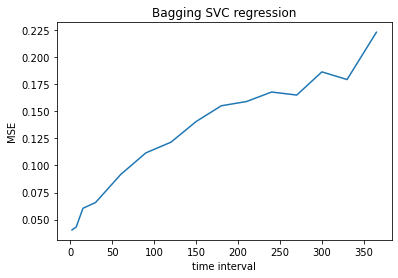

In [0]:
print("mse values at different time interval:")
print(MSE_wrt_window)
plt.plot(windows,MSE_wrt_window)
plt.xlabel('time interval')
plt.ylabel('MSE')
plt.title('Bagging SVC regression')
plt.show()

Boosting:

In [0]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
def predictions(X_train1, X_test1, y_train1, y_test1):
  X = np.asarray(X_train1)
  y = np.asarray(y_train1)
  kf = KFold(n_splits=10)
  kf.get_n_splits(X)
  Accuracy_foldwise=[]
  i=0
  for train_index, test_index in kf.split(X,y):
      # print("TRAIN:", train_index, "TEST:", test_index)
      i+=1
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
      clf = ensemble.GradientBoostingRegressor(**params).fit(X_train, y_train)
      mse = mean_squared_error(y_test, clf.predict(X_test))
      print("MSE: %.4f" % mse)
  clf= ensemble.GradientBoostingRegressor(**params).fit(X, y)
  y_pred=clf.predict(X_test1)
  print("for overall data:")
  print('Mean squared error: %.4f'% mean_squared_error(y_test1, y_pred))
  return mean_squared_error(y_test1, y_pred)
  print("----------------------------------------------------------------------------------------")

In [0]:
from sklearn.model_selection import train_test_split
num_features = 1
windows=[2,7,15,30,60,90,120,150,180,210,240,270,300,330,365]
MSE_wrt_window=[]
for i in windows:
  print("window size:",i)
  X, y = For_one_Timeseries_data(list(complete["INDIA - INDIAN RUPEE/US$"]), window=i)
  print("X:", X)
  print("Y:", y)
  print("X:", X.shape)
  print("Y:", y.shape)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  print("X train:", X_train.shape)
  print("y train:", y_train.shape)
  print("X test:", X_test.shape)
  print("y test:", y_test.shape) 
  MSE_wrt_window.append(predictions(X_train, X_test, y_train, y_test))

window size: 2
X: [[43.55 43.55]
 [43.55 43.55]
 [43.55 43.55]
 ...
 [71.28 71.45]
 [71.45 71.3 ]
 [71.3  71.3 ]]
Y: [43.55 43.55 43.55 ... 71.3  71.3  71.3 ]
X: (7300, 2)
Y: (7300,)
X train: (5840, 2)
y train: (5840,)
X test: (1460, 2)
y test: (1460,)
MSE: 0.0387
MSE: 0.0531
MSE: 0.0583
MSE: 0.0497
MSE: 0.0502
MSE: 0.0504
MSE: 0.0534
MSE: 0.0480
MSE: 0.0426
MSE: 0.0506
for overall data:
Mean squared error: 0.0441
window size: 7
X: [[43.55 43.55 43.55 ... 43.55 43.55 43.55]
 [43.55 43.55 43.55 ... 43.55 43.55 43.55]
 [43.55 43.55 43.55 ... 43.55 43.55 43.6 ]
 ...
 [71.24 71.24 71.24 ... 71.28 71.28 71.45]
 [71.24 71.24 71.23 ... 71.28 71.45 71.3 ]
 [71.24 71.23 71.28 ... 71.45 71.3  71.3 ]]
Y: [43.55 43.6  43.6  ... 71.3  71.3  71.3 ]
X: (7295, 7)
Y: (7295,)
X train: (5836, 7)
y train: (5836,)
X test: (1459, 7)
y test: (1459,)
MSE: 0.0631
MSE: 0.0666
MSE: 0.0501
MSE: 0.0518
MSE: 0.0399
MSE: 0.0539
MSE: 0.0371
MSE: 0.0455
MSE: 0.0659
MSE: 0.0483
for overall data:
Mean squared error: 0.0

mse values at different time interval:
[0.04412119526201206, 0.04007224287263021, 0.04932960696215726, 0.04294280468694507, 0.04939762605083432, 0.049474292698438956, 0.04077117492786808, 0.043661647072349534, 0.05252237065260693, 0.040970625287969575, 0.04120050877475625, 0.048211696276451055, 0.04535405984908907, 0.040567088572870884, 0.0481740239741306]


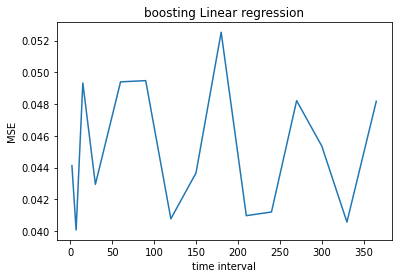

In [0]:
print("mse values at different time interval:")
print(MSE_wrt_window)
plt.plot(windows,MSE_wrt_window)
plt.xlabel('time interval')
plt.ylabel('MSE')
plt.title('boosting Linear regression')
plt.show()

Ridge regression:

In [0]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
import numpy as np
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
def predictions(X_train1, X_test1, y_train1, y_test1):
  X = np.asarray(X_train1)
  y = np.asarray(y_train1)
  kf = KFold(n_splits=10)
  kf.get_n_splits(X)
  Accuracy_foldwise=[]
  i=0
  for train_index, test_index in kf.split(X,y):
      # print("TRAIN:", train_index, "TEST:", test_index)
      i+=1
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
      clf = Ridge(alpha=1.0).fit(X_train, y_train)
      mse = mean_squared_error(y_test, clf.predict(X_test))
      print("MSE: %.4f" % mse)
  clf=Ridge(alpha=1.0).fit(X, y)
  y_pred=clf.predict(X_test1)
  print("for overall data:")
  print('Mean squared error: %.4f'% mean_squared_error(y_test1, y_pred))
  return mean_squared_error(y_test1, y_pred)
  print("----------------------------------------------------------------------------------------")

In [0]:
from sklearn.model_selection import train_test_split
num_features = 1
windows=[2,7,15,30,60,90,120,150,180,210,240,270,300,330,365]
MSE_wrt_window=[]
for i in windows:
  print("window size:",i)
  X, y = For_one_Timeseries_data(list(complete["INDIA - INDIAN RUPEE/US$"]), window=i)
  print("X:", X)
  print("Y:", y)
  print("X:", X.shape)
  print("Y:", y.shape)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  print("X train:", X_train.shape)
  print("y train:", y_train.shape)
  print("X test:", X_test.shape)
  print("y test:", y_test.shape) 
  MSE_wrt_window.append(predictions(X_train, X_test, y_train, y_test))

window size: 2
X: [[43.55 43.55]
 [43.55 43.55]
 [43.55 43.55]
 ...
 [71.28 71.45]
 [71.45 71.3 ]
 [71.3  71.3 ]]
Y: [43.55 43.55 43.55 ... 71.3  71.3  71.3 ]
X: (7300, 2)
Y: (7300,)
X train: (5840, 2)
y train: (5840,)
X test: (1460, 2)
y test: (1460,)
MSE: 0.0295
MSE: 0.0419
MSE: 0.0492
MSE: 0.0443
MSE: 0.0407
MSE: 0.0411
MSE: 0.0454
MSE: 0.0392
MSE: 0.0369
MSE: 0.0408
for overall data:
Mean squared error: 0.0356
window size: 7
X: [[43.55 43.55 43.55 ... 43.55 43.55 43.55]
 [43.55 43.55 43.55 ... 43.55 43.55 43.55]
 [43.55 43.55 43.55 ... 43.55 43.55 43.6 ]
 ...
 [71.24 71.24 71.24 ... 71.28 71.28 71.45]
 [71.24 71.24 71.23 ... 71.28 71.45 71.3 ]
 [71.24 71.23 71.28 ... 71.45 71.3  71.3 ]]
Y: [43.55 43.6  43.6  ... 71.3  71.3  71.3 ]
X: (7295, 7)
Y: (7295,)
X train: (5836, 7)
y train: (5836,)
X test: (1459, 7)
y test: (1459,)
MSE: 0.0510
MSE: 0.0495
MSE: 0.0383
MSE: 0.0406
MSE: 0.0293
MSE: 0.0437
MSE: 0.0320
MSE: 0.0372
MSE: 0.0583
MSE: 0.0410
for overall data:
Mean squared error: 0.0

mse values at different time interval:
[0.03562464093805271, 0.031255254310414246, 0.038956238968289196, 0.034970916142352905, 0.038406283197681176, 0.039941262042419, 0.03443220953508118, 0.03668205854288814, 0.04059848493789516, 0.035403103705286584, 0.03903563461616373, 0.04238265066328774, 0.0404892814105026, 0.03506207610654767, 0.04295410122095237]


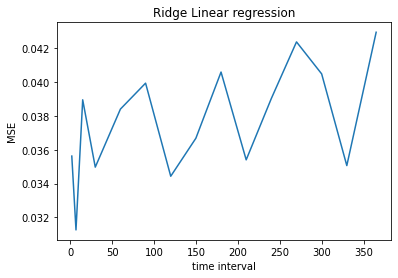

In [0]:
print("mse values at different time interval:")
print(MSE_wrt_window)
plt.plot(windows,MSE_wrt_window)
plt.xlabel('time interval')
plt.ylabel('MSE')

plt.title('Ridge Linear regression')
plt.show()

Lasso:

In [0]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn import linear_model
import numpy as np
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
def predictions(X_train1, X_test1, y_train1, y_test1):
  X = np.asarray(X_train1)
  y = np.asarray(y_train1)
  kf = KFold(n_splits=10)
  kf.get_n_splits(X)
  Accuracy_foldwise=[]
  i=0
  for train_index, test_index in kf.split(X,y):
      # print("TRAIN:", train_index, "TEST:", test_index)
      i+=1
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
      clf = linear_model.Lasso(alpha=0.1,max_iter=2000)
      clf.fit(X_train, y_train)
      mse = mean_squared_error(y_test, clf.predict(X_test))
      print("MSE: %.4f" % mse)
  clf = linear_model.Lasso(alpha=0.1,max_iter=2000)
  clf.fit(X, y)
  mse = mean_squared_error(y_test1, clf.predict(X_test1))
  print("overall mse for all data:")
  print("MSE: %.4f" % mse)
  return mse
  print("----------------------------------------------------------------------------------------")

In [0]:
from sklearn.model_selection import train_test_split
num_features = 1
windows=[2,7,15,30,60,90,120,150,180,210,240,270,300,330,365]
MSE_wrt_window=[]
for i in windows:
  print("window size:",i)
  X, y = For_one_Timeseries_data(list(complete["INDIA - INDIAN RUPEE/US$"]), window=i)
  print("X:", X)
  print("Y:", y)
  print("X:", X.shape)
  print("Y:", y.shape)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  print("X train:", X_train.shape)
  print("y train:", y_train.shape)
  print("X test:", X_test.shape)
  print("y test:", y_test.shape) 
  MSE_wrt_window.append(predictions(X_train, X_test, y_train, y_test))

window size: 2
X: [[43.55 43.55]
 [43.55 43.55]
 [43.55 43.55]
 ...
 [71.28 71.45]
 [71.45 71.3 ]
 [71.3  71.3 ]]
Y: [43.55 43.55 43.55 ... 71.3  71.3  71.3 ]
X: (7300, 2)
Y: (7300,)
X train: (5840, 2)
y train: (5840,)
X test: (1460, 2)
y test: (1460,)
MSE: 0.0352
MSE: 0.0479
MSE: 0.0634
MSE: 0.0482
MSE: 0.0456
MSE: 0.0434
MSE: 0.0553
MSE: 0.0471
MSE: 0.0413
MSE: 0.0507
overall mse for all data:
MSE: 0.0394
window size: 7
X: [[43.55 43.55 43.55 ... 43.55 43.55 43.55]
 [43.55 43.55 43.55 ... 43.55 43.55 43.55]
 [43.55 43.55 43.55 ... 43.55 43.55 43.6 ]
 ...
 [71.24 71.24 71.24 ... 71.28 71.28 71.45]
 [71.24 71.24 71.23 ... 71.28 71.45 71.3 ]
 [71.24 71.23 71.28 ... 71.45 71.3  71.3 ]]
Y: [43.55 43.6  43.6  ... 71.3  71.3  71.3 ]
X: (7295, 7)
Y: (7295,)
X train: (5836, 7)
y train: (5836,)
X test: (1459, 7)
y test: (1459,)
MSE: 0.0666
MSE: 0.0583
MSE: 0.0473
MSE: 0.0481
MSE: 0.0360
MSE: 0.0482
MSE: 0.0345
MSE: 0.0430
MSE: 0.0602
MSE: 0.0494
overall mse for all data:
MSE: 0.0374
window siz

mse values at different time interval:
[0.039423317467661784, 0.03743629714761912, 0.04482365252354964, 0.04061084544523568, 0.04598416923938767, 0.04768488002905701, 0.039184650546566765, 0.03984689260404171, 0.04537249272376939, 0.03651956160185325, 0.03922457792460776, 0.04781130854049259, 0.0425240733461686, 0.03828727655436059, 0.04562379895199799]


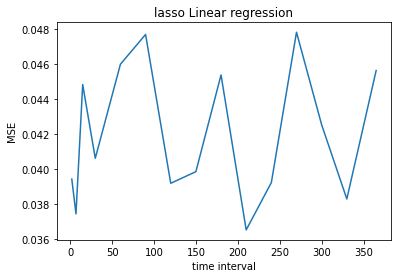

In [0]:
print("mse values at different time interval:")
print(MSE_wrt_window)
plt.plot(windows,MSE_wrt_window)
plt.xlabel('time interval')
plt.ylabel('MSE')
plt.title('lasso Linear regression')
plt.show()

Elastic Net:

In [0]:
from sklearn.linear_model import ElasticNet

In [0]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn import linear_model
import numpy as np
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
def predictions(X_train1, X_test1, y_train1, y_test1):
  X = np.asarray(X_train1)
  y = np.asarray(y_train1)
  kf = KFold(n_splits=10)
  kf.get_n_splits(X)
  Accuracy_foldwise=[]
  i=0
  for train_index, test_index in kf.split(X,y):
      # print("TRAIN:", train_index, "TEST:", test_index)
      i+=1
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      regr = ElasticNet(random_state=0,max_iter=2000).fit(X_train, y_train)
      mse = mean_squared_error(y_test, regr.predict(X_test))
      print("MSE: %.4f" % mse)
  regr = ElasticNet(random_state=0).fit(X, y)
  mse = mean_squared_error(y_test1, regr.predict(X_test1))
  print("overall mse:")
  print("MSE: %.4f" % mse)
  return mse
  print("----------------------------------------------------------------------------------------")

In [0]:
from sklearn.model_selection import train_test_split
num_features = 1
windows=[2,7,15,30,60,90,120,150,180,210,240,270,300,330,365]
MSE_wrt_window=[]
for i in windows:
  print("window size:",i)
  X, y = For_one_Timeseries_data(list(complete["INDIA - INDIAN RUPEE/US$"]), window=i)
  print("X:", X)
  print("Y:", y)
  print("X:", X.shape)
  print("Y:", y.shape)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  print("X train:", X_train.shape)
  print("y train:", y_train.shape)
  print("X test:", X_test.shape)
  print("y test:", y_test.shape) 
  MSE_wrt_window.append(predictions(X_train, X_test, y_train, y_test))

window size: 2
X: [[43.55 43.55]
 [43.55 43.55]
 [43.55 43.55]
 ...
 [71.28 71.45]
 [71.45 71.3 ]
 [71.3  71.3 ]]
Y: [43.55 43.55 43.55 ... 71.3  71.3  71.3 ]
X: (7300, 2)
Y: (7300,)
X train: (5840, 2)
y train: (5840,)
X test: (1460, 2)
y test: (1460,)
MSE: 0.0427
MSE: 0.0579
MSE: 0.0703
MSE: 0.0535
MSE: 0.0540
MSE: 0.0501
MSE: 0.0623
MSE: 0.0562
MSE: 0.0470
MSE: 0.0582
overall mse:
MSE: 0.0457
window size: 7
X: [[43.55 43.55 43.55 ... 43.55 43.55 43.55]
 [43.55 43.55 43.55 ... 43.55 43.55 43.55]
 [43.55 43.55 43.55 ... 43.55 43.55 43.6 ]
 ...
 [71.24 71.24 71.24 ... 71.28 71.28 71.45]
 [71.24 71.24 71.23 ... 71.28 71.45 71.3 ]
 [71.24 71.23 71.28 ... 71.45 71.3  71.3 ]]
Y: [43.55 43.6  43.6  ... 71.3  71.3  71.3 ]
X: (7295, 7)
Y: (7295,)
X train: (5836, 7)
y train: (5836,)
X test: (1459, 7)
y test: (1459,)
MSE: 0.1071
MSE: 0.0907
MSE: 0.0874
MSE: 0.0801
MSE: 0.0739
MSE: 0.0794
MSE: 0.0695
MSE: 0.0753
MSE: 0.0980
MSE: 0.0858
overall mse:
MSE: 0.0692
window size: 15
X: [[43.55 43.55 43.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97.39197282891075, tolerance: 54.91938662605325
  positive)


MSE: 0.0826
MSE: 0.0931
MSE: 0.1049
MSE: 0.1024
MSE: 0.0860
MSE: 0.0938
MSE: 0.0838
MSE: 0.1103
MSE: 0.0954
MSE: 0.0838


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153.5900032327708, tolerance: 54.6576543898603
  positive)


overall mse:
MSE: 0.0849
window size: 30
X: [[43.55 43.55 43.55 ... 43.65 43.65 43.62]
 [43.55 43.55 43.55 ... 43.65 43.62 43.65]
 [43.55 43.55 43.55 ... 43.62 43.65 43.65]
 ...
 [71.75 71.75 71.65 ... 71.28 71.28 71.45]
 [71.75 71.65 71.65 ... 71.28 71.45 71.3 ]
 [71.65 71.65 71.65 ... 71.45 71.3  71.3 ]]
Y: [43.65 43.65 43.65 ... 71.3  71.3  71.3 ]
X: (7272, 30)
Y: (7272,)
X train: (5817, 30)
y train: (5817,)
X test: (1455, 30)
y test: (1455,)
MSE: 0.0967
MSE: 0.0843
MSE: 0.0735
MSE: 0.1147
MSE: 0.1058
MSE: 0.1150
MSE: 0.0774
MSE: 0.0973
MSE: 0.0901
MSE: 0.0979
overall mse:
MSE: 0.0745
window size: 60
X: [[43.55 43.55 43.55 ... 43.65 43.63 43.65]
 [43.55 43.55 43.55 ... 43.63 43.65 43.65]
 [43.55 43.55 43.55 ... 43.65 43.65 43.63]
 ...
 [70.86 70.96 71.01 ... 71.28 71.28 71.45]
 [70.96 71.01 70.76 ... 71.28 71.45 71.3 ]
 [71.01 70.76 70.79 ... 71.45 71.3  71.3 ]]
Y:

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141.59293736244422, tolerance: 54.49369644811108
  positive)


 [43.65 43.63 43.63 ... 71.3  71.3  71.3 ]
X: (7242, 60)
Y: (7242,)
X train: (5793, 60)
y train: (5793,)
X test: (1449, 60)
y test: (1449,)
MSE: 0.0963
MSE: 0.0928
MSE: 0.0835
MSE: 0.1044
MSE: 0.0983
MSE: 0.0821
MSE: 0.0647
MSE: 0.1272
MSE: 0.0904
MSE: 0.0930


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142.29953898026423, tolerance: 54.53154548211021
  positive)


overall mse:
MSE: 0.0825
window size: 90
X: [[43.55  43.55  43.55  ... 43.65  43.65  43.632]
 [43.55  43.55  43.55  ... 43.65  43.632 43.632]
 [43.55  43.55  43.55  ... 43.632 43.632 43.632]
 ...
 [70.64  70.64  71.11  ... 71.28  71.28  71.45 ]
 [70.64  71.11  71.17  ... 71.28  71.45  71.3  ]
 [71.11  71.17  71.03  ... 71.45  71.3   71.3  ]]
Y: [43.632 43.632 43.65  ... 71.3   71.3   71.3  ]
X: (7212, 90)
Y: (7212,)
X train: (5769, 90)
y train: (5769,)
X test: (1443, 90)
y test: (1443,)
MSE: 0.1201
MSE: 0.0911
MSE: 0.0653
MSE: 0.0981
MSE: 0.0810
MSE: 0.1009
MSE: 0.0791
MSE: 0.1000
MSE: 0.0864
MSE: 0.1066


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141.43697228869337, tolerance: 53.9093050980176
  positive)


overall mse:
MSE: 0.0873
window size: 120
X: [[43.55 43.55 43.55 ... 43.67 43.67 43.67]
 [43.55 43.55 43.55 ... 43.67 43.67 43.75]
 [43.55 43.55 43.55 ... 43.67 43.75 43.73]
 ...
 [71.45 72.2  72.2  ... 71.28 71.28 71.45]
 [72.2  72.2  72.2  ... 71.28 71.45 71.3 ]
 [72.2  72.2  72.2  ... 71.45 71.3  71.3 ]]
Y: [43.75 43.73 43.67 ... 71.3  71.3  71.3 ]
X: (7182, 120)
Y: (7182,)
X train: (5745, 120)
y train: (5745,)
X test: (1437, 120)
y test: (1437,)
MSE: 0.0981
MSE: 0.0913
MSE: 0.0783
MSE: 0.1039
MSE: 0.0854
MSE: 0.1347
MSE: 0.0807
MSE: 0.0885
MSE: 0.0810
MSE: 0.1187


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141.92447022860915, tolerance: 54.19106124661194
  positive)


overall mse:
MSE: 0.0737
window size: 150
X: [[43.55 43.55 43.55 ... 44.65 44.65 44.65]
 [43.55 43.55 43.55 ... 44.65 44.65 44.65]
 [43.55 43.55 43.55 ... 44.65 44.65 44.7 ]
 ...
 [68.81 69.   69.65 ... 71.28 71.28 71.45]
 [69.   69.65 70.8  ... 71.28 71.45 71.3 ]
 [69.65 70.8  70.8  ... 71.45 71.3  71.3 ]]
Y: [44.65 44.7  44.75 ... 71.3  71.3  71.3 ]
X: (7152, 150)
Y: (7152,)
X train: (5721, 150)
y train: (5721,)
X test: (1431, 150)
y test: (1431,)
MSE: 0.0843
MSE: 0.0987
MSE: 0.0734
MSE: 0.1024
MSE: 0.0920
MSE: 0.1274
MSE: 0.0805
MSE: 0.0935
MSE: 0.1117
MSE: 0.0974


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141.08583487430343, tolerance: 53.69045709157089
  positive)


overall mse:
MSE: 0.0735
window size: 180
X: [[43.55 43.55 43.55 ... 44.72 44.73 44.7 ]
 [43.55 43.55 43.55 ... 44.73 44.7  44.72]
 [43.55 43.55 43.55 ... 44.7  44.72 44.72]
 ...
 [68.87 68.87 68.79 ... 71.28 71.28 71.45]
 [68.87 68.79 68.48 ... 71.28 71.45 71.3 ]
 [68.79 68.48 68.48 ... 71.45 71.3  71.3 ]]
Y: [44.72 44.72 44.72 ... 71.3  71.3  71.3 ]
X: (7122, 180)
Y: (7122,)
X train: (5697, 180)
y train: (5697,)
X test: (1425, 180)
y test: (1425,)
MSE: 0.0684
MSE: 0.0821
MSE: 0.0624
MSE: 0.0948
MSE: 0.1041
MSE: 0.0988
MSE: 0.0909
MSE: 0.1373
MSE: 0.0904
MSE: 0.1161


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138.22972778668844, tolerance: 54.00111378797319
  positive)


overall mse:
MSE: 0.0809
window size: 210
X: [[43.55 43.55 43.55 ... 44.96 45.15 45.15]
 [43.55 43.55 43.55 ... 45.15 45.15 45.15]
 [43.55 43.55 43.55 ... 45.15 45.15 45.15]
 ...
 [69.15 69.15 69.15 ... 71.28 71.28 71.45]
 [69.15 69.15 69.28 ... 71.28 71.45 71.3 ]
 [69.15 69.28 69.41 ... 71.45 71.3  71.3 ]]
Y: [45.15 45.15 45.4  ... 71.3  71.3  71.3 ]
X: (7092, 210)
Y: (7092,)
X train: (5673, 210)
y train: (5673,)
X test: (1419, 210)
y test: (1419,)
MSE: 0.1224
MSE: 0.0814
MSE: 0.1222
MSE: 0.0835
MSE: 0.0990
MSE: 0.0915
MSE: 0.0893
MSE: 0.0969
MSE: 0.0775
MSE: 0.1089


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141.95907001784008, tolerance: 53.930965552662165
  positive)


overall mse:
MSE: 0.0703
window size: 240
X: [[43.55 43.55 43.55 ... 45.83 45.83 46.  ]
 [43.55 43.55 43.55 ... 45.83 46.   45.9 ]
 [43.55 43.55 43.55 ... 46.   45.9  45.9 ]
 ...
 [69.4  69.08 69.4  ... 71.28 71.28 71.45]
 [69.08 69.4  69.4  ... 71.28 71.45 71.3 ]
 [69.4  69.4  69.4  ... 71.45 71.3  71.3 ]]
Y: [45.9 45.9 45.8 ... 71.3 71.3 71.3]
X: (7062, 240)
Y: (7062,)
X train: (5649, 240)
y train: (5649,)
X test: (1413, 240)
y test: (1413,)
MSE: 0.0969
MSE: 0.1293
MSE: 0.1020
MSE: 0.0866
MSE: 0.0952
MSE: 0.0824
MSE: 0.0863
MSE: 0.1156
MSE: 0.0857
MSE: 0.0882


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140.8956339417981, tolerance: 53.4581375487589
  positive)


overall mse:
MSE: 0.0736
window size: 270
X: [[43.55 43.55 43.55 ... 46.1  46.15 46.05]
 [43.55 43.55 43.55 ... 46.15 46.05 46.06]
 [43.55 43.55 43.55 ... 46.05 46.06 46.1 ]
 ...
 [68.91 68.58 69.03 ... 71.28 71.28 71.45]
 [68.58 69.03 69.11 ... 71.28 71.45 71.3 ]
 [69.03 69.11 69.56 ... 71.45 71.3  71.3 ]]
Y: [46.06 46.1  46.1  ... 71.3  71.3  71.3 ]
X: (7032, 270)
Y: (7032,)
X train: (5625, 270)
y train: (5625,)
X test: (1407, 270)
y test: (1407,)
MSE: 0.1047
MSE: 0.0998
MSE: 0.1102
MSE: 0.1098
MSE: 0.0790
MSE: 0.0779
MSE: 0.0806
MSE: 0.0886
MSE: 0.0911
MSE: 0.0966


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137.55328367048878, tolerance: 53.555215274360975
  positive)


overall mse:
MSE: 0.0827
window size: 300
X: [[43.55 43.55 43.55 ... 46.7  46.78 46.78]
 [43.55 43.55 43.55 ... 46.78 46.78 46.78]
 [43.55 43.55 43.55 ... 46.78 46.78 46.78]
 ...
 [70.91 70.91 70.55 ... 71.28 71.28 71.45]
 [70.91 70.55 70.02 ... 71.28 71.45 71.3 ]
 [70.55 70.02 70.09 ... 71.45 71.3  71.3 ]]
Y: [46.78 46.78 46.9  ... 71.3  71.3  71.3 ]
X: (7002, 300)
Y: (7002,)
X train: (5601, 300)
y train: (5601,)
X test: (1401, 300)
y test: (1401,)
MSE: 0.0965
MSE: 0.0865
MSE: 0.1484
MSE: 0.0985
MSE: 0.0805
MSE: 0.0881
MSE: 0.0833
MSE: 0.1027
MSE: 0.1022
MSE: 0.0762


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137.73924718053564, tolerance: 53.281033965582694
  positive)


overall mse:
MSE: 0.0769
window size: 330
X: [[43.55 43.55 43.55 ... 46.9  46.9  46.9 ]
 [43.55 43.55 43.55 ... 46.9  46.9  46.93]
 [43.55 43.55 43.55 ... 46.9  46.93 46.95]
 ...
 [71.41 71.66 71.66 ... 71.28 71.28 71.45]
 [71.66 71.66 71.66 ... 71.28 71.45 71.3 ]
 [71.66 71.66 71.52 ... 71.45 71.3  71.3 ]]
Y: [46.93 46.95 46.87 ... 71.3  71.3  71.3 ]
X: (6972, 330)
Y: (6972,)
X train: (5577, 330)
y train: (5577,)
X test: (1395, 330)
y test: (1395,)
MSE: 0.0899
MSE: 0.1187
MSE: 0.1333
MSE: 0.0833
MSE: 0.0829
MSE: 0.0886
MSE: 0.0894
MSE: 0.1069
MSE: 0.0899
MSE: 0.0913


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136.59215748700063, tolerance: 53.04284513168972
  positive)


overall mse:
MSE: 0.0716
window size: 365
X: [[43.55 43.55 43.55 ... 46.74 46.74 46.74]
 [43.55 43.55 43.55 ... 46.74 46.74 46.74]
 [43.55 43.55 43.55 ... 46.74 46.74 46.75]
 ...
 [69.92 69.58 69.58 ... 71.28 71.28 71.45]
 [69.58 69.58 69.58 ... 71.28 71.45 71.3 ]
 [69.58 69.58 70.02 ... 71.45 71.3  71.3 ]]
Y: [46.74 46.75 46.78 ... 71.3  71.3  71.3 ]
X: (6937, 365)
Y: (6937,)
X train: (5549, 365)
y train: (5549,)
X test: (1388, 365)
y test: (1388,)
MSE: 0.0971
MSE: 0.0845
MSE: 0.0776
MSE: 0.1037
MSE: 0.1093
MSE: 0.0970
MSE: 0.1008
MSE: 0.0809
MSE: 0.1313
MSE: 0.0848
overall mse:
MSE: 0.0799


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142.47008927613888, tolerance: 53.2905633142054
  positive)


mse values at different time interval:
[0.0457311833617268, 0.06923276134794493, 0.08491084678945708, 0.07451252948015588, 0.08246326022030599, 0.08730968689978369, 0.0737366270202602, 0.07353554015313464, 0.08090347901368668, 0.07026090909431054, 0.07360679402825338, 0.0827287544891673, 0.07688434928548624, 0.07159339410438981, 0.07987396150874969]


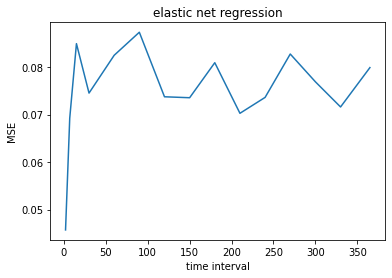

In [0]:
print("mse values at different time interval:")
print(MSE_wrt_window)
plt.plot(windows,MSE_wrt_window)
plt.xlabel('time interval')
plt.ylabel('MSE')
plt.title('elastic net regression')
plt.show()

LSTM:

In [34]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout
from keras.layers import Dense

Using TensorFlow backend.


In [35]:
# We need to add one more dimension to X, i.e Num of features in 1 sample of time step. as we are doing a univariate prediction which means number of features are 1 only
X = X.reshape((X.shape[0], X.shape[1], num_features))  # For LSTM
print("-----------")
print("X:", X.shape)
print(X)
print("Y:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("-----------")
print("X train:", X_train.shape)
print("y train:", y_train.shape)
print("X test:", X_test.shape)
print("y test:", y_test.shape)

-----------
X: (7300, 2, 1)
[[[43.55]
  [43.55]]

 [[43.55]
  [43.55]]

 [[43.55]
  [43.55]]

 ...

 [[71.28]
  [71.45]]

 [[71.45]
  [71.3 ]]

 [[71.3 ]
  [71.3 ]]]
Y: (7300,)
-----------
X train: (5110, 2, 1)
y train: (5110,)
X test: (2190, 2, 1)
y test: (2190,)


In [56]:
model = Sequential()
model.add(LSTM(7, activation='relu', input_shape=(2, num_features)))
# model.add(Dropout(0.1))
model.add(Dense(20,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(10,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=5, verbose=1)

Epoch 1/5
5110/5110 [==============================] - 1s 135us/step - loss: 2982.0442
Epoch 2/5
5110/5110 [==============================] - 0s 63us/step - loss: 2370.0351
Epoch 3/5
5110/5110 [==============================] - 0s 65us/step - loss: 1.8449
Epoch 4/5
5110/5110 [==============================] - 0s 63us/step - loss: 0.2453
Epoch 5/5
5110/5110 [==============================] - 0s 63us/step - loss: 0.1053


In [0]:
yPred = model.predict(X_test, verbose=0)
yPred.shape = yPred.shape[0]

In [58]:
mse = mean_squared_error(y_test, yPred)
print("MSE: %.4f" % mse)

MSE: 0.0498


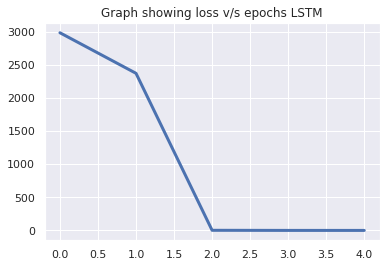

In [62]:
plt.plot(history.history['loss'])
plt.title('Graph showing loss v/s epochs LSTM' )
plt.show()

Gaussian process:

In [0]:
# .gaussian:https://colab.research.google.com/github/krasserm/bayesian-machine-learning/blob/master/gaussian_processes.ipynb#scrollTo=HyEuWjnKVchf:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,DotProduct,WhiteKernel, ConstantKernel as C 

In [0]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.gaussian_process.kernels import Matern,ExpSineSquared,RationalQuadratic
import numpy as np
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
def predictions(X_train1, X_test1, y_train1, y_test1):
  X = np.asarray(X_train1)
  y = np.asarray(y_train1)
  kf = KFold(n_splits=2)
  kf.get_n_splits(X)
  Accuracy_foldwise=[]
  i=0
  for train_index, test_index in kf.split(X,y):
      # print("TRAIN:", train_index, "TEST:", test_index)
      i+=1
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      # kernel=WhiteKernel()+DotProduct() //0.034
      print("----------------------------------------------------------------------------------------")
      # kernel= C(1.0) * Matern(length_scale=1.0, nu=2.5)*RBF()+WhiteKernel()+DotProduct() 
      print("----------------------------------------------------------------------------------------")
      # kernel=C(1.0, (1e-3, 1e3)) * Matern(length_scale=1.0, nu=2.5)+ WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e-4))+DotProduct() 
      # gp =GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9).fit(X_train, y_train)//0.04365
      print("----------------------------------------------------------------------------------------")
      # kernel= Matern(length_scale=1.0, nu=2.5)+WhiteKernel()+DotProduct()     0.0419 mse
      # gp =GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9).fit(X_train, y_train)
      print("----------------------------------------------------------------------------------------")
      kernel= 34.4**2 * RBF(length_scale=41.8)+ 3.27**2 * RBF(length_scale=180) * ExpSineSquared(length_scale=1.44,periodicity=1)+ 0.446**2 * RationalQuadratic(alpha=17.7, length_scale=0.957)+ 0.197**2 * RBF(length_scale=0.138) + WhiteKernel(noise_level=0.0336)

      gp =GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9).fit(X_train, y_train)
      print("----------------------------------------------------------------------------------------")
      y_pred, sigma = gp.predict(X_test, return_std=True)
      mse = mean_squared_error(y_test, gp.predict(X_test))
      print("MSE: %.4f" % mse)
  regr =GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9).fit(X, y)
  mse = mean_squared_error(y_test1, regr.predict(X_test1))
  print("overall mse:")
  print("MSE: %.4f" % mse)
  return mse
  print("----------------------------------------------------------------------------------------")

In [32]:
from sklearn.model_selection import train_test_split
num_features = 1
windows=[2]
MSE_wrt_window=[]
for i in windows:
  print("window size:",i)
  X, y = For_one_Timeseries_data(list(complete["INDIA - INDIAN RUPEE/US$"]), window=i)
  print("X:", X)
  print("Y:", y)
  print("X:", X.shape)
  print("Y:", y.shape)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  print("X train:", X_train.shape)
  print("y train:", y_train.shape)
  print("X test:", X_test.shape)
  print("y test:", y_test.shape)
  MSE_wrt_window.append(predictions(X_train, X_test, y_train, y_test))

window size: 2
X: [[43.55 43.55]
 [43.55 43.55]
 [43.55 43.55]
 ...
 [71.28 71.45]
 [71.45 71.3 ]
 [71.3  71.3 ]]
Y: [43.55 43.55 43.55 ... 71.3  71.3  71.3 ]
X: (7300, 2)
Y: (7300,)
X train: (5840, 2)
y train: (5840,)
X test: (1460, 2)
y test: (1460,)
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


----------------------------------------------------------------------------------------
MSE: 0.0456
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
MSE: 0.0449


KeyboardInterrupt: ignored

In [0]:
# GaussianProcessRegressor(kernel=1.0 * Matern(length_scale=1.0, nu=1.5), n_restarts_optimizer=9,optimizer='adam')

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * Matern(length_scale=1, nu=1.5),
                         n_restarts_optimizer=9, normalize_y=False,
                         optimizer='adam', random_state=None)

mse values at window 2 with different kernels:


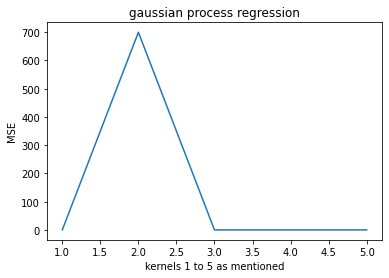

In [33]:
print("mse values at window 2 with different kernels:")
plt.plot([1,2,3,4,5],[0.034,700,0.04365,0.0419,0.04365])
plt.xlabel('kernels 1 to 5 as mentioned')
plt.ylabel('MSE')
plt.title('gaussian process regression')
plt.show()